# ANALYSIS

Notebook for the Analysis of the simulations with the correct lipid ratios.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from tqdm import tqdm

In [21]:
PATH_I="Simulation_1/9-ANALYSIS/"
PATH_II="Simulation_2/9-ANALYSIS/"
PATH_III="Simulation_3/9-ANALYSIS/"

In [13]:
def get_block(arr):
    STE = []
    AVER = []
    LEN = []

    for blk in range(2, 100):

        BLOCKS = np.array_split(arr, blk)

        BLOCK_AVERAGE = [np.mean(block) for block in BLOCKS]

        BLOCK_ERR = np.std(BLOCK_AVERAGE)/np.sqrt(blk)

        BLOCK_LENGTH = len(arr)/blk

        BLOCK_AV = np.mean(BLOCK_AVERAGE)

        STE.append(BLOCK_ERR)
        AVER.append(BLOCK_AV)
        LEN.append(BLOCK_LENGTH)
    
    return np.array(STE), np.array(AVER), np.array(LEN)

In [14]:
def get_bse(arr, blk):
    STE = []
    AVER = []
    LEN = []

    BLOCKS = np.array_split(arr, blk)

    BLOCK_AVERAGE = [np.mean(block) for block in BLOCKS]

    BLOCK_ERR = np.std(BLOCK_AVERAGE)/np.sqrt(blk)

    BLOCK_LENGTH = len(arr)/blk

    BLOCK_AV = np.mean(BLOCK_AVERAGE)

    STE.append(BLOCK_ERR)
    AVER.append(BLOCK_AV)
    LEN.append(BLOCK_LENGTH)
    
    return np.array(STE), np.array(AVER), np.array(LEN)

## Box

In [22]:
BOX_I = np.loadtxt(PATH_I + "BOX/box.xvg", skiprows = 26)
BOX_II = np.loadtxt(PATH_II + "BOX/box.xvg", skiprows = 26)
BOX_III = np.loadtxt(PATH_III + "BOX/box.xvg", skiprows = 26)

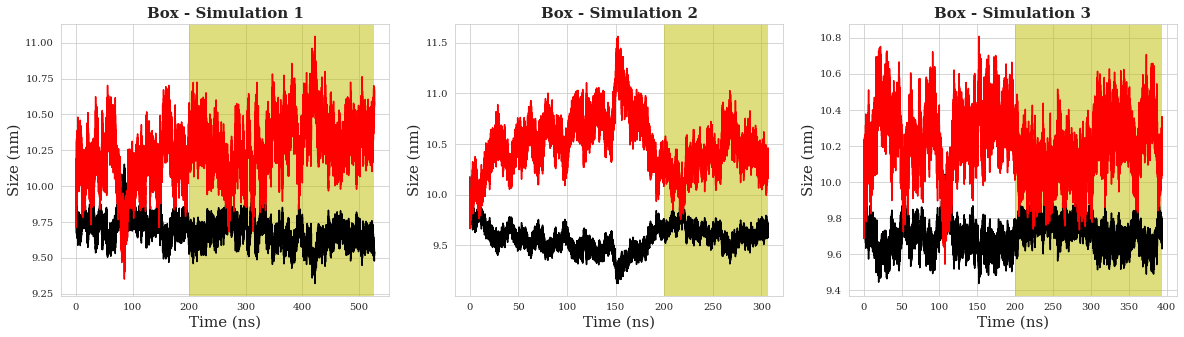

In [54]:
sns.set_style("whitegrid", {'font.family':'serif', 'font.serif':'Computer Modern'})
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

for i in range(3):
    ax[i].grid(True)
    ax[i].set_ylabel("Size (nm)", fontsize = 15)
    ax[i].set_xlabel("Time (ns)", fontsize = 15)
    ax[i].set_title("Box - Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    
color = ["k", "r"]
for i, col in enumerate(color):
    #N = 500
    #s = np.convolve(BOX_I[:, i+2], np.ones(N)/N, mode='valid')
    #ax[0].plot(s, color = col)
    ax[0].plot(BOX_I[:, 0]*0.001, BOX_I[:, i+2], color = col)
    ax[1].plot(BOX_II[:, 0]*0.001, BOX_II[:, i+2], color = col)
    ax[2].plot(BOX_III[:, 0]*0.001, BOX_III[:, i+2], color = col)

ax[0].axvspan(200, np.max(T_I[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[1].axvspan(200, np.max(T_II[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[2].axvspan(200, np.max(T_III[:, 0]*0.001), color='y', alpha=0.5, lw=0)

plt.savefig("Box_1.svg", dpi = 300)

## Area per Lipid

In [36]:
APL_I = np.loadtxt(PATH_I + "FATSLIM/PLOT_APL.xvg", skiprows = 24, usecols = [0, 1, 2, 3, 4])
APL_II = np.loadtxt(PATH_II + "FATSLIM/PLOT_APL_CutOff_4.xvg", skiprows = 24, usecols = [0, 1, 2, 3, 4])
APL_III = np.loadtxt(PATH_III + "FATSLIM/PLOT_APL_4.xvg", skiprows = 24, usecols = [0, 1, 2, 3, 4])

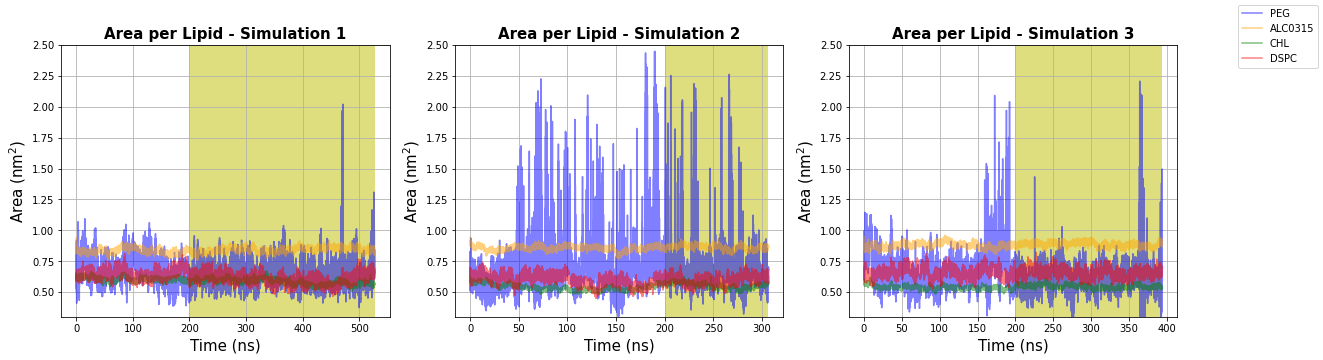

In [41]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

for i in range(3):
    ax[i].grid(True)
    ax[i].set_ylabel(r"Area (nm$^2$)", fontsize = 15)
    ax[i].set_xlabel("Time (ns)", fontsize = 15)
    ax[i].set_title("Area per Lipid - Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    ax[i].set_ylim([0.3, 2.5])

color = ["blue", "orange", "green", "red"]

for i, col in enumerate(color):

    ax[0].plot(APL_I[:, 0]*0.001, APL_I[:, i+1], color = col, alpha = 0.5)
    ax[1].plot(APL_II[:, 0]*0.001, APL_II[:, i+1], color = col, alpha = 0.5)
    ax[2].plot(APL_III[:, 0]*0.001, APL_III[:, i+1], color = col, alpha = 0.5)
    
ax[0].axvspan(200, np.max(T_I[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[1].axvspan(200, np.max(T_II[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[2].axvspan(200, np.max(T_III[:, 0]*0.001), color='y', alpha=0.5, lw=0)

fig.legend(["PEG", "ALC0315", "CHL", "DSPC"])
#plt.savefig("APL_1.png", dpi = 300)

In [42]:
APL_I[20000:, 1:].mean(0)
APL_II[20000:, 1:].mean(0)
APL_II[20000:, 1:].mean(0)

array([0.67225432, 0.86238949, 0.5526349 , 0.60051876])

In [43]:
BLOCK_I_1 = get_block(APL_I[20000:, 1])
BLOCK_II_1 = get_block(APL_II[20000:, 1])
BLOCK_III_1 = get_block(APL_III[20000:, 1])

BLOCK_I_2 = get_block(APL_I[20000:, 2])
BLOCK_II_2 = get_block(APL_II[20000:, 2])
BLOCK_III_2 = get_block(APL_III[20000:, 2])

BLOCK_I_3 = get_block(APL_I[20000:, 3])
BLOCK_II_3 = get_block(APL_II[20000:, 3])
BLOCK_III_3 = get_block(APL_III[20000:, 3])

BLOCK_I_4 = get_block(APL_I[20000:, 4])
BLOCK_II_4 = get_block(APL_II[20000:, 4])
BLOCK_III_4 = get_block(APL_III[20000:, 4])

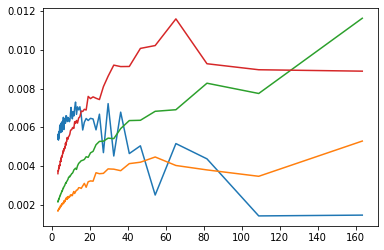

In [44]:
plt.plot(BLOCK_I_1[-1]*0.01, BLOCK_I_1[0])
plt.plot(BLOCK_I_2[-1]*0.01, BLOCK_I_2[0])
plt.plot(BLOCK_I_3[-1]*0.01, BLOCK_I_3[0])
plt.plot(BLOCK_I_4[-1]*0.01, BLOCK_I_4[0])

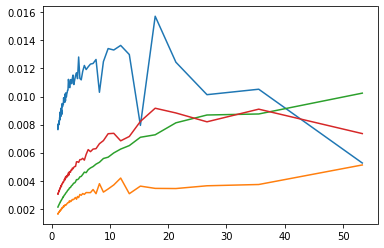

In [45]:
plt.plot(BLOCK_II_1[-1]*0.01, BLOCK_II_1[0])
plt.plot(BLOCK_II_2[-1]*0.01, BLOCK_II_2[0])
plt.plot(BLOCK_II_3[-1]*0.01, BLOCK_II_3[0])
plt.plot(BLOCK_II_4[-1]*0.01, BLOCK_II_4[0])

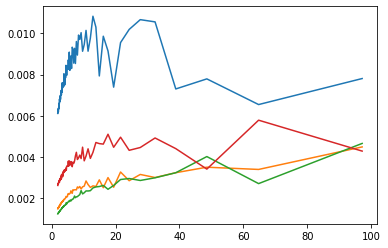

In [46]:
plt.plot(BLOCK_III_1[-1]*0.01, BLOCK_III_1[0])
plt.plot(BLOCK_III_2[-1]*0.01, BLOCK_III_2[0])
plt.plot(BLOCK_III_3[-1]*0.01, BLOCK_III_3[0])
plt.plot(BLOCK_III_4[-1]*0.01, BLOCK_III_4[0])

In [47]:
len(APL_I[20000:, 1])/(40/0.01)

8.16975

In [48]:
APL_I_STE = []
APL_II_STE = []
APL_III_STE = []

APL_I_AVG = []
APL_II_AVG = []
APL_III_AVG = []

for i in range(1,5):
    OUTP = get_bse(APL_I[20000:, i], np.floor(len(APL_I[20000:, 1])/(40/0.01))) #block sizes of 40 ns
    APL_I_STE.append(OUTP[0][0])
    APL_I_AVG.append(OUTP[1][0])
    
for i in range(1,5):
    OUTP = get_bse(APL_II[20000:, i], np.floor(len(APL_II[20000:, 1])/(40/0.01)))
    APL_II_STE.append(OUTP[0][0])
    APL_II_AVG.append(OUTP[1][0])
    
for i in range(1,5):
    OUTP = get_bse(APL_III[20000:, i], np.floor(len(APL_III[20000:, 1])/(40/0.01)))
    APL_III_STE.append(OUTP[0][0])
    APL_III_AVG.append(OUTP[1][0])

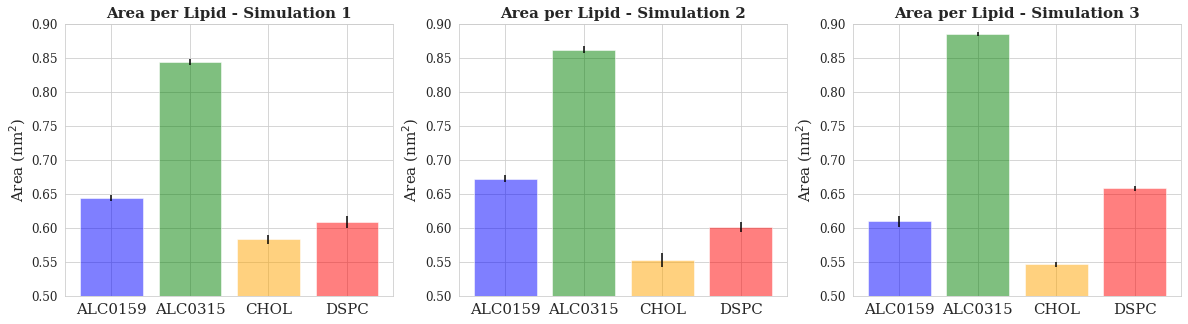

In [52]:
sns.set_style("whitegrid", {'font.family':'serif', 'font.serif':'Computer Modern'})
fig, ax = plt.subplots(1, 3, figsize = (20, 5))



legend = ["ALC0159", "ALC0315", "CHOL", "DSPC"]
ax[0].bar(legend, APL_I_AVG, yerr = APL_I_STE, color = ["blue","green","orange","red"], alpha = 0.5)
ax[1].bar(legend, APL_II_AVG, yerr = APL_II_STE, color = ["blue","green","orange","red"], alpha = 0.5)
ax[2].bar(legend, APL_III_AVG, yerr = APL_III_STE, color = ["blue","green","orange","red"], alpha = 0.5)

for i in range(3):
    
    ax[i].set_title("Area per Lipid - Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    ax[i].set_ylim([0.5, 0.9])
    ax[i].tick_params(axis = 'x', which = 'major', labelsize = 15)
    ax[i].tick_params(axis = 'y', which = 'major', labelsize = 12)
    ax[i].set_ylabel(r"Area (nm$^2$)", fontsize = 15)
    
plt.savefig("APL_2.svg", dpi = 300)

## Thickness

Thickness was determined by DSPC and ALC0315.

In [55]:
T_I = np.loadtxt(PATH_I + "FATSLIM/PLOT_THICKNESS_WO_CHOL.xvg", skiprows = 15, usecols = [0, 1])
T_II = np.loadtxt(PATH_II + "FATSLIM/PLOT_THICKNESS_WO_CHOL.xvg", skiprows = 15, usecols = [0, 1])
T_III = np.loadtxt(PATH_III + "FATSLIM/PLOT_THICKNESS_WO_CHOL.xvg", skiprows = 15, usecols = [0, 1])

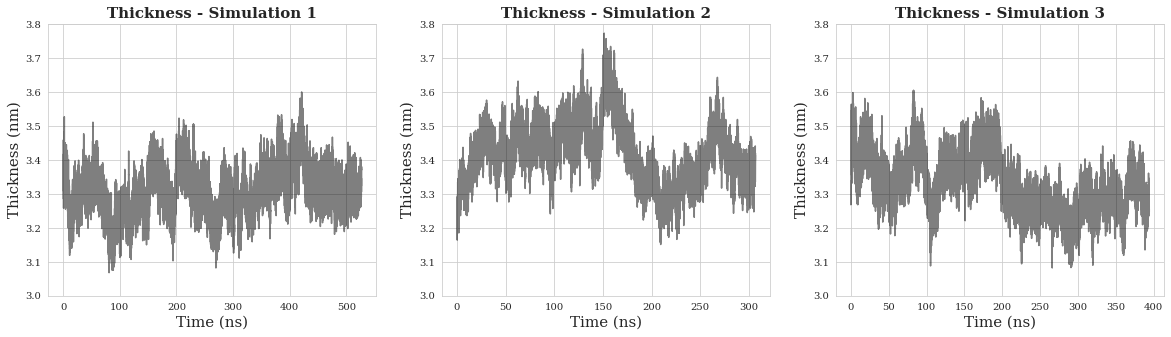

In [56]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

for i in range(3):
    ax[i].grid(True)
    ax[i].set_ylabel(r"Thickness (nm)", fontsize = 15)
    ax[i].set_xlabel("Time (ns)", fontsize = 15)
    ax[i].set_title("Thickness - Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    ax[i].set_ylim([3, 3.8])


ax[0].plot(T_I[:, 0]*0.001, T_I[:, 1:], color = "black", alpha=0.5)
ax[1].plot(T_II[:, 0]*0.001, T_II[:, 1:], color = "black", alpha=0.5)
ax[2].plot(T_III[:, 0]*0.001, T_III[:, 1:], color = "black", alpha=0.5)

plt.savefig("Thickness_1.svg", dpi = 300)

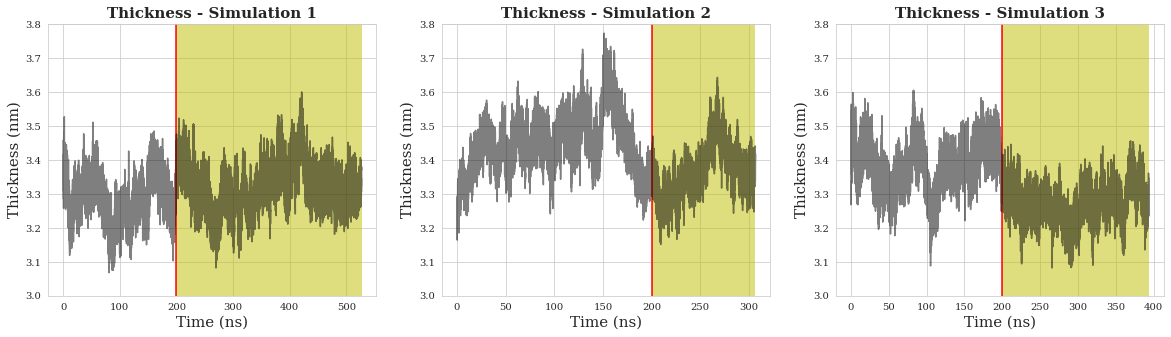

In [68]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

for i in range(3):
    ax[i].grid(True)
    ax[i].set_ylabel(r"Thickness (nm)", fontsize = 15)
    ax[i].set_xlabel("Time (ns)", fontsize = 15)
    ax[i].set_title("Thickness - Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    ax[i].set_ylim([3, 3.8])
    ax[i].vlines(200, 3, 3.8, color = "red")

ax[0].axvspan(200, np.max(T_I[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[1].axvspan(200, np.max(T_II[:, 0]*0.001), color='y', alpha=0.5, lw=0)
ax[2].axvspan(200, np.max(T_III[:, 0]*0.001), color='y', alpha=0.5, lw=0)

ax[0].plot(T_I[:, 0]*0.001, T_I[:, 1:], color = "black", alpha=0.5)
ax[1].plot(T_II[:, 0]*0.001, T_II[:, 1:], color = "black", alpha=0.5)
ax[2].plot(T_III[:, 0]*0.001, T_III[:, 1:], color = "black", alpha=0.5)

plt.savefig("Thickness_2.png", dpi = 300)

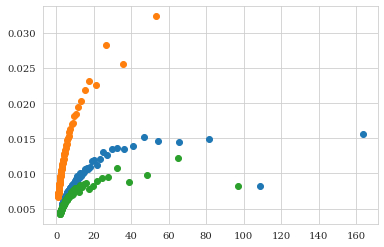

In [63]:
plt.scatter(get_block(T_I[20000:, 1])[-1]*0.01, get_block(T_I[20000:, 1])[0])
plt.scatter(get_block(T_II[20000:, 1])[-1]*0.01, get_block(T_II[20000:, 1])[0])
plt.scatter(get_block(T_III[20000:, 1])[-1]*0.01, get_block(T_III[20000:, 1])[0])

In [64]:
T_STE = []

T_AVG = []

OUTP = get_bse(T_I[20000:, 1], np.floor(len(T_I[20000:, 1])/(40/0.01)))
T_STE.append(OUTP[0][0])
T_AVG.append(OUTP[1][0])
    
OUTP = get_bse(T_II[20000:, 1], np.floor(len(T_II[20000:, 1])/(40/0.01)))
T_STE.append(OUTP[0][0])
T_AVG.append(OUTP[1][0])

OUTP = get_bse(T_III[20000:, 1], np.floor(len(T_III[20000:, 1])/(40/0.01)))
T_STE.append(OUTP[0][0])
T_AVG.append(OUTP[1][0])

In [65]:
np.floor(len(T_II[20000:, 1])/(40/0.01))

2.0

In [66]:
len(T_II[20000:, 1])

10660

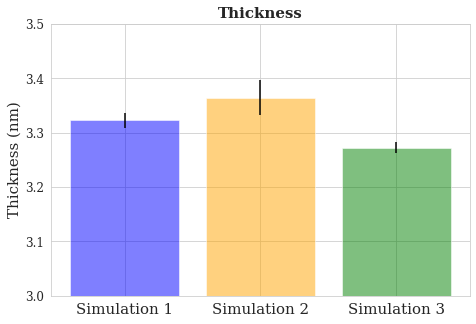

In [67]:
plt.figure(figsize = (7.5, 5))

legend = ["Simulation 1", "Simulation 2", "Simulation 3"]
plt.bar(legend, T_AVG, yerr = T_STE, color = ["blue", "orange", "green"], alpha = 0.5)

plt.xticks(size = 15)
plt.yticks(size = 12)
           
plt.ylim([3.0, 3.5])

plt.ylabel("Thickness (nm)", fontsize = 15)
plt.title("Thickness", fontsize = 15, fontweight = "bold")

plt.savefig("Thickness_3.png", dpi = 300)

## Density

In [70]:
Density_Heads_I = np.loadtxt(PATH_I + "DENSITY/Density_Heads.xvg", skiprows = 27)
Density_Tails_I = np.loadtxt(PATH_I + "DENSITY/Density_Tails.xvg", skiprows = 27)

Density_Heads_II = np.loadtxt(PATH_II + "DENSITY/Density_Heads.xvg", skiprows = 27)
Density_Tails_II = np.loadtxt(PATH_II + "DENSITY/Density_Tails.xvg", skiprows = 27)

Density_Heads_III = np.loadtxt(PATH_III + "DENSITY/Density_Heads.xvg", skiprows = 27)
Density_Tails_III = np.loadtxt(PATH_III + "DENSITY/Density_Tails.xvg", skiprows = 27)

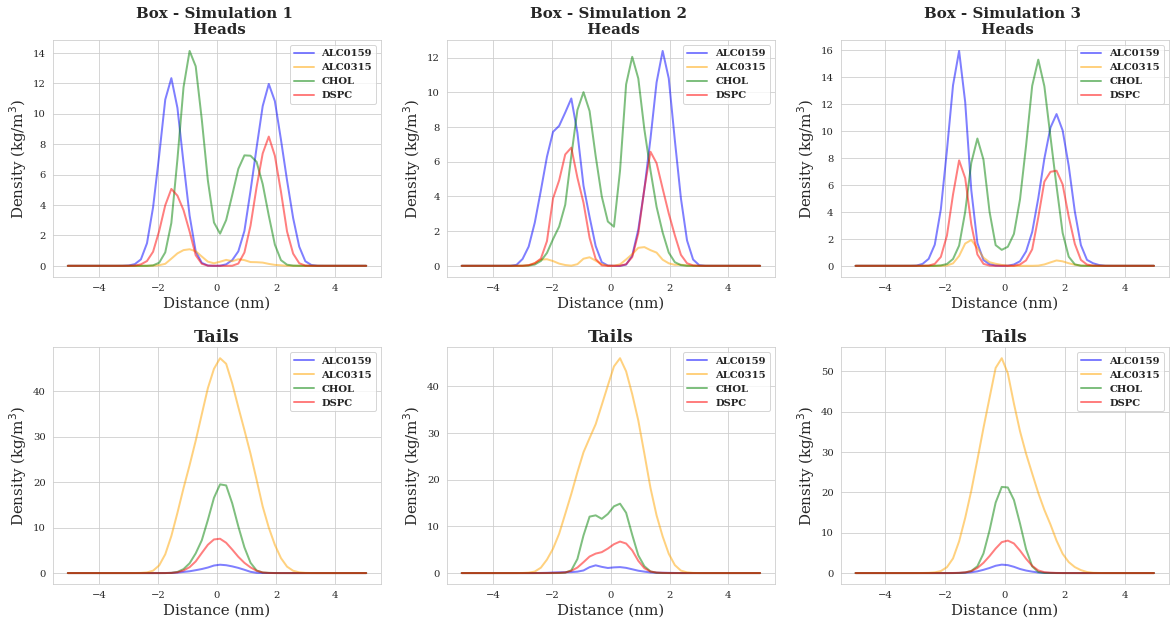

In [72]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
legend = ["ALC0159", "ALC0315", "CHOL", "DSPC"]
color = ["blue", "orange", "green", "red"]

for i, col in enumerate(color):

    ax[0, 0].plot(Density_Heads_I[:, 0], Density_Heads_I[:, i+1], color = col, alpha = 0.5, linewidth = 2)
    ax[1, 0].plot(Density_Tails_I[:, 0], Density_Tails_I[:, i+1], color = col, alpha = 0.5, linewidth = 2)

    ax[0, 1].plot(Density_Heads_II[:, 0], Density_Heads_II[:, i+1], color = col, alpha = 0.5, linewidth = 2)
    ax[1, 1].plot(Density_Tails_II[:, 0], Density_Tails_II[:, i+1], color = col, alpha = 0.5, linewidth = 2)

    ax[0, 2].plot(Density_Heads_III[:, 0], Density_Heads_III[:, i+1], color = col, alpha = 0.5, linewidth = 2)
    ax[1, 2].plot(Density_Tails_III[:, 0], Density_Tails_III[:, i+1], color = col, alpha = 0.5, linewidth = 2)

for i in range(2):
    for j in range(3):
        ax[i,j].grid(True)
        ax[i,j].set_ylabel(r"Density (kg/m$^3$)", fontsize = 15)
        ax[i,j].set_xlabel("Distance (nm)", fontsize = 15)
    
        ax[0,j].set_title("Box - Simulation {} \n Heads".format(j+1), fontsize = 15, fontweight = "bold")
        ax[1,j].set_title("Tails".format(i+1), fontsize = 17.5, fontweight = "bold")

        ax[i, j].legend(legend, prop = {"weight":"bold"})

plt.subplots_adjust(hspace = 0.3)
plt.savefig("Density.svg", dpi = 300)

## Polystat

In [74]:
POLYSTAT_I = np.zeros((len(T_I), 6))

for i in range(6):

    POLYSTAT_I[:, i] = np.loadtxt(PATH_I + "POLYMER/Polystat_{}.xvg".format(i), skiprows = 28, usecols = [1])


In [75]:
POLYSTAT_II = np.zeros((len(T_II), 6))

for i in range(6):

    POLYSTAT_II[:, i] = np.loadtxt(PATH_II + "POLYMER/Polystat_{}.xvg".format(i), skiprows = 28, usecols = [1])



In [76]:
POLYSTAT_III = np.zeros((len(T_III), 6))

for i in range(6):

    POLYSTAT_III[:, i] = np.loadtxt(PATH_III + "POLYMER/Polystat_{}.xvg".format(i), skiprows = 28, usecols = [1])

In [77]:
PERSIST_I = np.zeros((len(T_I), 6))

for i in range(6):

    PERSIST_I[:, i] = np.loadtxt(PATH_I + "POLYMER/Persist_{}.xvg".format(i), skiprows = 17, usecols = [1])

In [78]:
PERSIST_II = np.zeros((len(T_II), 6))

for i in range(6):

    PERSIST_II[:, i] = np.loadtxt(PATH_II + "POLYMER/Persist_{}.xvg".format(i), skiprows = 17, usecols = [1])

In [79]:
PERSIST_III = np.zeros((len(T_III), 6))

for i in range(6):

    PERSIST_III[:, i] = np.loadtxt(PATH_III + "POLYMER/Persist_{}.xvg".format(i), skiprows = 17, usecols = [1])

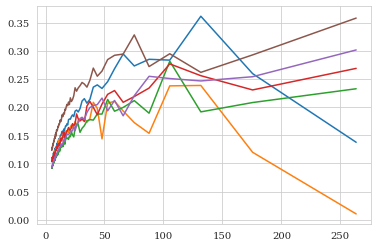

In [80]:
for i in range(6):
    plt.plot(get_block(POLYSTAT_I[:, i])[-1] * 0.01, get_block(POLYSTAT_I[:, i])[0])

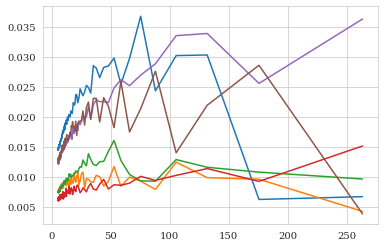

In [81]:
for i in range(6):
    plt.plot(get_block(PERSIST_I[:, i])[-1] * 0.01, get_block(PERSIST_I[:, i])[0])

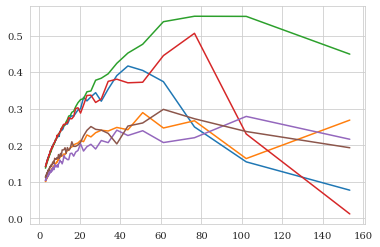

In [82]:
for i in range(6):
    plt.plot(get_block(POLYSTAT_II[:, i])[-1] * 0.01, get_block(POLYSTAT_II[:, i])[0])

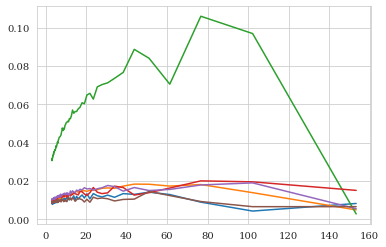

In [83]:
for i in range(6):
    plt.plot(get_block(PERSIST_II[:, i])[-1] * 0.01, get_block(PERSIST_II[:, i])[0])

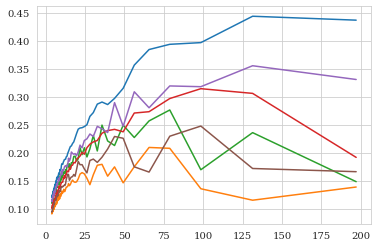

In [84]:
for i in range(6):
    plt.plot(get_block(POLYSTAT_III[:, i])[-1] * 0.01, get_block(POLYSTAT_III[:, i])[0])

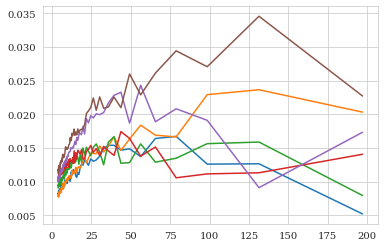

In [85]:
for i in range(6):
    plt.plot(get_block(PERSIST_III[:, i])[-1] * 0.01, get_block(PERSIST_III[:, i])[0])

In [86]:
ROG_I_STE = []
ROG_II_STE = []
ROG_III_STE = []

ROG_I_AVER = []
ROG_II_AVER = []
ROG_III_AVER = []

for i in range(6):

    BLOCK_I = get_bse(POLYSTAT_I[:, i], len(POLYSTAT_I[:, i])/(50/0.01))
    
    ROG_I_STE.append(BLOCK_I[0][0])
    ROG_I_AVER.append(BLOCK_I[1][0])
    
for i in range(6):

    BLOCK_II = get_bse(POLYSTAT_II[:, i], len(POLYSTAT_II[:, i])/(50/0.01))
    
    ROG_II_STE.append(BLOCK_II[0][0])
    ROG_II_AVER.append(BLOCK_II[1][0])
    
for i in range(6):

    BLOCK_III = get_bse(POLYSTAT_III[:, i], len(POLYSTAT_III[:, i])/(50/0.01))
    
    ROG_III_STE.append(BLOCK_III[0][0])
    ROG_III_AVER.append(BLOCK_III[1][0])

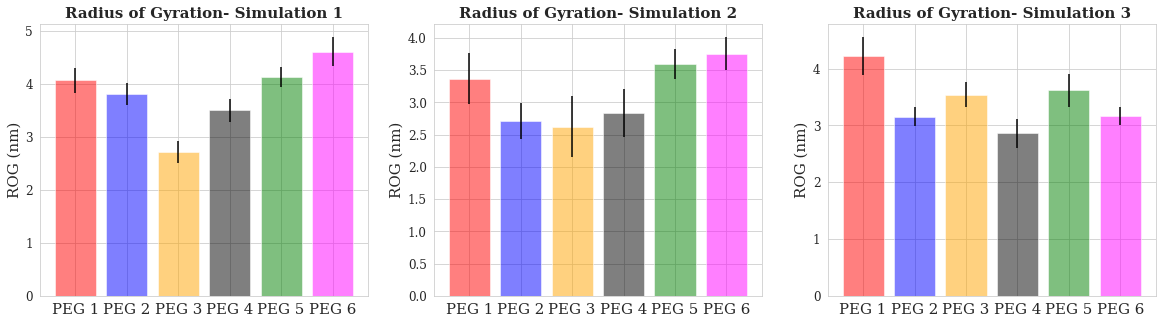

In [101]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

legend = ["PEG 1", "PEG 2", "PEG 3", "PEG 4", "PEG 5", "PEG 6"]


ax[0].bar(legend, ROG_I_AVER, yerr = ROG_I_STE , color = ["red", "blue", "orange", "black", "green", "magenta"], alpha = 0.5)

ax[1].bar(legend, ROG_II_AVER, yerr = ROG_II_STE , color = ["red", "blue", "orange", "black", "green", "magenta"], alpha = 0.5)

ax[2].bar(legend, ROG_III_AVER, yerr = ROG_III_STE , color = ["red", "blue", "orange", "black", "green", "magenta"], alpha = 0.5)

for i in range(3):
    
    ax[i].set_title("Radius of Gyration- Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    #ax[i].set_ylim([0.5, 0.9])
    ax[i].tick_params(axis = 'x', which = 'major', labelsize = 15, rotation=0)
    ax[i].tick_params(axis = 'y', which = 'major', labelsize = 12)
    ax[i].set_ylabel(r"ROG (nm)", fontsize = 15)
    
plt.savefig("ROG.svg", dpi = 300)

In [93]:
PERS_I_STE = []
PERS_II_STE = []
PERS_III_STE = []

PERS_I_AVER = []
PERS_II_AVER = []
PERS_III_AVER = []

for i in range(6):

    BLOCK_I = get_bse(PERSIST_I[:, i], len(PERSIST_I[:, i])/(50/0.01))
    
    PERS_I_STE.append(BLOCK_I[0][0])
    PERS_I_AVER.append(BLOCK_I[1][0])
    
for i in range(6):

    BLOCK_II = get_bse(PERSIST_II[:, i], len(PERSIST_II[:, i])/(50/0.01))
    
    PERS_II_STE.append(BLOCK_II[0][0])
    PERS_II_AVER.append(BLOCK_II[1][0])
    
for i in range(6):

    BLOCK_III = get_bse(PERSIST_III[:, i], len(PERSIST_III[:, i])/(50/0.01))
    
    PERS_III_STE.append(BLOCK_III[0][0])
    PERS_III_AVER.append(BLOCK_III[1][0])

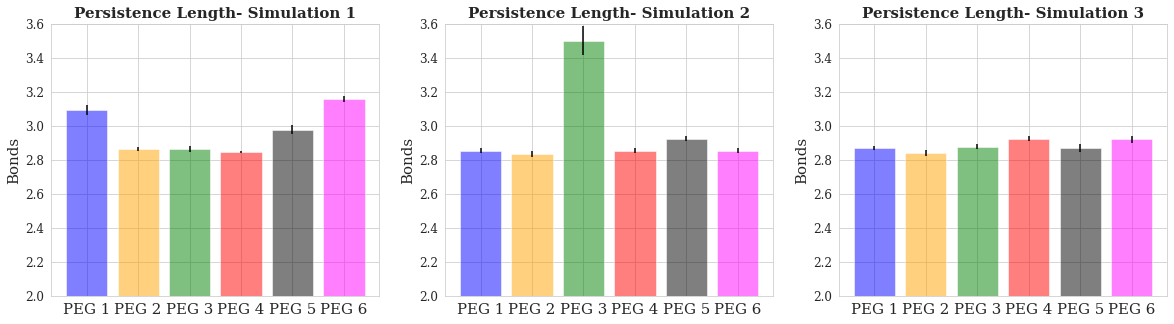

In [102]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

legend = ["PEG 1", "PEG 2", "PEG 3", "PEG 4", "PEG 5", "PEG 6"]


ax[0].bar(legend, PERS_I_AVER, yerr = PERS_I_STE , color = ["blue", "orange", "green", "red", "black", "magenta"], alpha = 0.5)

ax[1].bar(legend, PERS_II_AVER, yerr = PERS_II_STE , color = ["blue", "orange", "green", "red", "black", "magenta"], alpha = 0.5)

ax[2].bar(legend, PERS_III_AVER, yerr = PERS_III_STE , color = ["blue", "orange", "green", "red", "black", "magenta"], alpha = 0.5)

for i in range(3):
    
    ax[i].set_title("Persistence Length- Simulation {}".format(i+1), fontsize = 15, fontweight = "bold")
    ax[i].set_ylim([2.0, 3.6])
    ax[i].tick_params(axis = 'x', which = 'major', labelsize = 15)
    ax[i].tick_params(axis = 'y', which = 'major', labelsize = 12)
    ax[i].set_ylabel(r"Bonds", fontsize = 15)
    
plt.savefig("persistence.svg", dpi = 300)

# MSD

In [441]:
MSD_I = np.loadtxt(PATH_I + "DIFFUSION/MSD.xvg", skiprows = 23)
MSD_II = np.loadtxt(PATH_II + "DIFFUSION/MSD.xvg", skiprows = 23)
MSD_III = np.loadtxt(PATH_III + "DIFFUSION/MSD.xvg", skiprows = 23)

In [442]:
def einstein_relation(time, msd, begin, end, d = 2):
    
    D, c = np.polyfit(time[begin:end], msd[begin:end]/(2*d), 1)
    
    return D, c

In [465]:
beg, en = 2000, 6000

Ds1, cs1 = einstein_relation(MSD_I[:, 0], MSD_I[:, 1], begin = beg, end = en)
Ds2, cs2 = einstein_relation(MSD_I[:, 0], MSD_I[:, 2], begin = beg, end = en)
Ds3, cs3 = einstein_relation(MSD_I[:, 0], MSD_I[:, 3], begin = beg, end = en)
Ds4, cs4 = einstein_relation(MSD_I[:, 0], MSD_I[:, 4], begin = beg, end = en)

Ds = [Ds1, Ds2, Ds3, Ds4]
cs = [cs1, cs2, cs3, cs4]

for i in range(4):
    
     print("D: " + str(np.round(Ds[i] * 10**6, 2)) + r"x10$^{-8}$ cm$^2$/s")

D: 2.19x10$^{-8}$ cm$^2$/s
D: 1.19x10$^{-8}$ cm$^2$/s
D: 2.67x10$^{-8}$ cm$^2$/s
D: 2.25x10$^{-8}$ cm$^2$/s


In [466]:
beg, en = 1000, 2500

Ds1, cs1 = einstein_relation(MSD_II[:, 0], MSD_II[:, 1], begin = beg, end = en)
Ds2, cs2 = einstein_relation(MSD_II[:, 0], MSD_II[:, 2], begin = beg, end = en)
Ds3, cs3 = einstein_relation(MSD_II[:, 0], MSD_II[:, 3], begin = beg, end = en)
Ds4, cs4 = einstein_relation(MSD_II[:, 0], MSD_II[:, 4], begin = beg, end = en)

Ds = [Ds1, Ds2, Ds3, Ds4]
cs = [cs1, cs2, cs3, cs4]

for i in range(4):
    
     print("D: " + str(np.round(Ds[i] * 10**6, 2)) + r"x10$^{-8}$ cm$^2$/s")

D: 3.14x10$^{-8}$ cm$^2$/s
D: 2.73x10$^{-8}$ cm$^2$/s
D: 3.13x10$^{-8}$ cm$^2$/s
D: 3.35x10$^{-8}$ cm$^2$/s


In [467]:
beg, en = 2000, 6000

Ds1, cs1 = einstein_relation(MSD_III[:, 0], MSD_III[:, 1], begin = beg, end = en)
Ds2, cs2 = einstein_relation(MSD_III[:, 0], MSD_III[:, 2], begin = beg, end = en)
Ds3, cs3 = einstein_relation(MSD_III[:, 0], MSD_III[:, 3], begin = beg, end = en)
Ds4, cs4 = einstein_relation(MSD_III[:, 0], MSD_III[:, 4], begin = beg, end = en)

Ds = [Ds1, Ds2, Ds3, Ds4]
cs = [cs1, cs2, cs3, cs4]

for i in range(4):
    
     print("D: " + str(np.round(Ds[i] * 10**6, 2)) + r"x10$^{-8}$ cm$^2$/s")

D: 2.13x10$^{-8}$ cm$^2$/s
D: 2.49x10$^{-8}$ cm$^2$/s
D: 2.45x10$^{-8}$ cm$^2$/s
D: 2.29x10$^{-8}$ cm$^2$/s


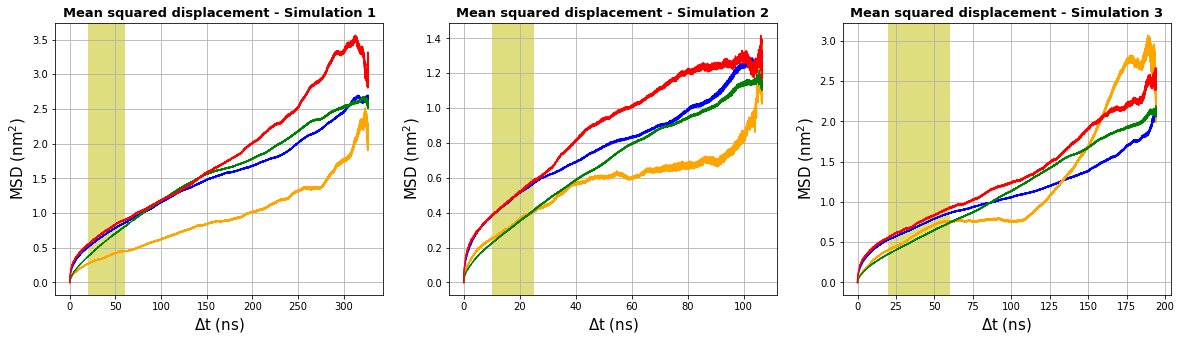

In [463]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

legend = ["ALC0159", "ALC0315", "CHOL", "DSPC"]
color = ["blue", "orange", "green", "red"]

for i in range(3):
    
    ax[i].grid(True)
    ax[i].set_ylabel(r"MSD (nm$^2$)", fontsize = 15)
    ax[i].set_xlabel(r"$\Delta$t (ns)", fontsize = 15)
    ax[i].set_title("Mean squared displacement - Simulation {}".format(i+1), fontweight = "bold", fontsize = 13)

ax[0].axvspan(20, 60, color='y', alpha=0.5, lw=0)
ax[1].axvspan(10, 25, color='y', alpha=0.5, lw=0)
ax[2].axvspan(20, 60, color='y', alpha=0.5, lw=0)

for i, col in enumerate(color):
    ax[0].plot(MSD_I[:, 0]*0.001, MSD_I[:, i+1], color = col)
    ax[1].plot(MSD_II[:, 0]*0.001, MSD_II[:, i+1], color = col)
    ax[2].plot(MSD_III[:, 0]*0.001, MSD_III[:, i+1], color = col)



# Bending Modulus

Sim1 = 4.834106926403572 kBT

Sim2 = 6.114453911265522 kBT

Sim3 = 5.297293708555264 kBT

In [112]:
kbT=298*(1.38064852* 10**(-23))
Kc_1=kbT*4.834106926403572 
Kc_2=kbT*6.114453911265522
Kc_3=kbT*5.297293708555264

print(Kc_1); print(Kc_2); print(Kc_3) # Joules

1.98891236689133e-20
2.515689699472692e-20
2.1794828141791965e-20


Experimental Kc values suggests that a pure DPPC GUV has $15 \times 10^{-20} $J, DOPC $10.9 \times 10^{-20} $J and DOPE $10 \times 10^{-20} $J at 49.4, 23, 22 degrees celsius respectively.

## Area Compressibility

Sim1 = 154.51006782151262 mN/m = dyn/cm

Sim2 = 142.4201131679631 mN/m

Sim3 = 188.9906018913507 mN/m

In [114]:
23+273


296